In [2]:
!pip install imageio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [1]:
# see load_label_png.py also.
import numpy as np
import PIL.Image
import imageio
import os
import csv

In [2]:
# label_png = '/home/latai/Documents/Master_thesis_v2/data/test3/label/0.png'
label_png = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/0.png'
lbl = np.asarray(PIL.Image.open(label_png))
print(lbl.dtype)
print(np.unique(lbl))
print(lbl.shape)

uint8
[ 0  1  2  3  7 14 16]
(240, 320)


In [4]:
[ 0  1  3  4  7  9 21]

SyntaxError: invalid syntax (<ipython-input-4-f5ef8ca39795>, line 1)

In [6]:
label_png = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/0.png'
lbl = np.asarray(PIL.Image.open(label_png))
print(lbl.dtype)
print(np.unique(lbl))
print(lbl.shape)

uint8
[ 0  1  2  3  7 14 16]
(240, 320)


In [6]:
# Example script to convert label images from the *_2d-label.zip or *_2d-label-filt.zip data for each scan.
# Note: already preprocessed data for a set of frames subsampled from the full datasets is available to download through the ScanNet download.
# Input:
#   - path to label image to convert
#   - label mapping file (scannetv2-labels.combined.tsv)
#   - output image file
# Outputs the label image with nyu40 labels as an 8-bit image 
#
# example usage: convert_scannet_label_image.py --input_file [path to input label image] --label_map_file [path to scannet-labels.combined.tsv] --output_file [output image file]
# (see util.visualize_label_image() for producing a colored visualization)


# python imports
import math
import os, sys, argparse
import inspect

try:
    import numpy as np
except:
    print ("Failed to import numpy package.")
    sys.exit(-1)
try:
    import imageio
except:
    print("Please install the module 'imageio' for image processing, e.g.")
    print("pip install imageio")
    sys.exit(-1)

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)
import util

parser = argparse.ArgumentParser()
parser.add_argument('--input_file', required=True, help='path to input label image')
parser.add_argument('--label_map_file', required=True, help='path to scannetv2-labels.combined.tsv')
parser.add_argument('--output_file', required=True, help='output image file')
opt = parser.parse_args()


def map_label_image(image, label_mapping):
    mapped = np.copy(image)
    for k,v in label_mapping.iteritems():
        mapped[image==k] = v
    return mapped.astype(np.uint8)


def main():
    image = np.array(imageio.imread(opt.input_file))
    label_map = util.read_label_mapping(opt.label_map_file, label_from='id', label_to='nyu40id')
    mapped_image = map_label_image(image, label_map)
    imageio.imwrite(opt.output_file, mapped_image)
    # uncomment to save out visualization
    # util.visualize_label_image(os.path.splitext(opt.output_file)[0] + '_vis.jpg', mapped_image)


if __name__ == '__main__':
    main()

usage: ipykernel_launcher.py [-h] --input_file INPUT_FILE --label_map_file
                             LABEL_MAP_FILE --output_file OUTPUT_FILE
ipykernel_launcher.py: error: the following arguments are required: --input_file, --label_map_file, --output_file


SystemExit: 2

In [39]:
a = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/0_test.png'

'/'.join(a.split('/')[:-1])+'/'+a.split('/')[-1].split('.')[0]

'/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/0_test'

In [43]:
def map_label_image(image, label_mapping):
    mapped = np.copy(image)
    for k,v in label_mapping.items():
        mapped[image==k] = v
    return mapped.astype(np.uint8)


def main(input_file,label_map_file, output_file ):
    
    image = np.array(imageio.imread(input_file))
    # Only two classes
#     image[image != 1] = 0
    label_map = read_label_mapping(label_map_file, label_from='id', label_to='nyu40id')
    mapped_image = map_label_image(image, label_map)
    imageio.imwrite(output_file, mapped_image)
    print(mapped_image.shape)
    a = '/'.join(input_file.split('/')[:-1])+'/'+input_file.split('/')[-1].split('.')[0]
    visualize_label_image(a + '_vis_new.jpg', mapped_image)

In [44]:
# if string s represents an int
def represents_int(s):
    try: 
        int(s)
        return True
    except ValueError:
        return 
    
def read_label_mapping(filename, label_from='raw_category', label_to='nyu40id'):
    assert os.path.isfile(filename)
    mapping = dict()
    with open(filename) as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t')
#         print(reader)
        for row in reader:
#             print(row)
            mapping[row[label_from]] = int(row[label_to])
    # if ints convert 
#     print(mapping.keys()[0])
    if represents_int(list(mapping.keys())[0]):
        mapping = {int(k):v for k,v in mapping.items()}
    return mapping

# color by label
def visualize_label_image(filename, image):
#     print(image.shape)
    height = image.shape[0]
    width = image.shape[1]
    vis_image = np.zeros([height, width, 3], dtype=np.uint8)
    color_palette = create_color_palette()
    for idx, color in enumerate(color_palette):
        vis_image[image==idx] = color
    imageio.imwrite(filename, vis_image)

# color palette for nyu40 labels
def create_color_palette():
    return [
       (0, 0, 0),
       (174, 199, 232),
       (152, 223, 138),
       (31, 119, 180), 
       (255, 187, 120),
       (188, 189, 34), 
       (140, 86, 75),  
       (255, 152, 150),
       (214, 39, 40),  
       (197, 176, 213),
       (148, 103, 189),
       (196, 156, 148),
       (23, 190, 207),
       (178, 76, 76),  
       (247, 182, 210),
       (66, 188, 102), 
       (219, 219, 141),
       (140, 57, 197), 
       (202, 185, 52), 
       (51, 176, 203), 
       (200, 54, 131), 
       (92, 193, 61),  
       (78, 71, 183),  
       (172, 114, 82), 
       (255, 127, 14), 
       (91, 163, 138), 
       (153, 98, 156), 
       (140, 153, 101),
       (158, 218, 229),
       (100, 125, 154),
       (178, 127, 135),
       (120, 185, 128),
       (146, 111, 194),
       (44, 160, 44),  
       (112, 128, 144),
       (96, 207, 209), 
       (227, 119, 194),
       (213, 92, 176), 
       (94, 106, 211), 
       (82, 84, 163),
       (100, 85, 144)
    ]

In [17]:
label_png = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/0_test.png'
label_map_file = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/scannetv2-labels.combined.tsv'
output_file = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/out_test.png'
main(label_png, label_map_file, output_file)

/tmp/ipykernel_85517/2605272964.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = np.array(imageio.imread(input_file))


In [14]:
label_png = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/0_test.png'
label_map_file = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/scannetv2-labels.combined.tsv'
output_file = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/out_test.png'
main(label_png, label_map_file, output_file)

/tmp/ipykernel_85517/3678483362.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = np.array(imageio.imread(input_file))


In [33]:
label_png = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/data/0.png'
label_map_file = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/scannetv2-labels.combined.tsv'
output_file = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/out_test.png'
main(label_png, label_map_file, output_file)

(240, 320)


/tmp/ipykernel_85517/2492040379.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = np.array(imageio.imread(input_file))


In [45]:
path = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/data/'

for i in os.listdir(path):
    print(path+i)
    label_png = path+i
    label_map_file = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/scannetv2-labels.combined.tsv'
    output_file = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/out_test.png'
    main(label_png, label_map_file, output_file)
    

/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/data/20.png
(240, 320)
/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/data/60.png
(240, 320)
/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/data/40.png
(240, 320)
/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/data/0.png
(240, 320)
/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/data/80.png
(240, 320)


/tmp/ipykernel_85517/1221539875.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = np.array(imageio.imread(input_file))


In [16]:
import os

files = os.listdir("/home/manojkl/Documents/MT/Data/label")

for i in files:
    label_png = '/home/manojkl/Documents/MT/Data/label/'+i
#     print(label_png)
    label_map_file = '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/scannetv2-labels.combined.tsv'
    output_file = '/home/manojkl/Documents/MT/Data/label/'+i.split(".")[0]+"_color_two_class.jpg"
    main(label_png, label_map_file, output_file)

In [24]:
import os
import matplotlib.pyplot as plt
from PIL import Image

c =  os.listdir("/home/manojkl/Documents/MT/Data/labels_compare/2_classes/")
a =  os.listdir("/home/manojkl/Documents/MT/Data/labels_compare/color/")
b =  os.listdir("/home/manojkl/Documents/MT/Data/labels_compare/color_mask/")

In [28]:
for i,j,j in zip(a,b,c):
    print(i,j,k)

80.jpg 80_color_two_class_vis.jpg 80_color_two_class_vis.jpg
0.jpg 60_color_two_class_vis.jpg 80_color_two_class_vis.jpg
140.jpg 100_color_two_class_vis.jpg 80_color_two_class_vis.jpg
100.jpg 120_color_two_class_vis.jpg 80_color_two_class_vis.jpg
40.jpg 0_color_two_class_vis.jpg 80_color_two_class_vis.jpg
20.jpg 20_color_two_class_vis.jpg 80_color_two_class_vis.jpg
60.jpg 140_color_two_class_vis.jpg 80_color_two_class_vis.jpg
120.jpg 40_color_two_class_vis.jpg 80_color_two_class_vis.jpg


ValueError: not enough values to unpack (expected 4, got 2)

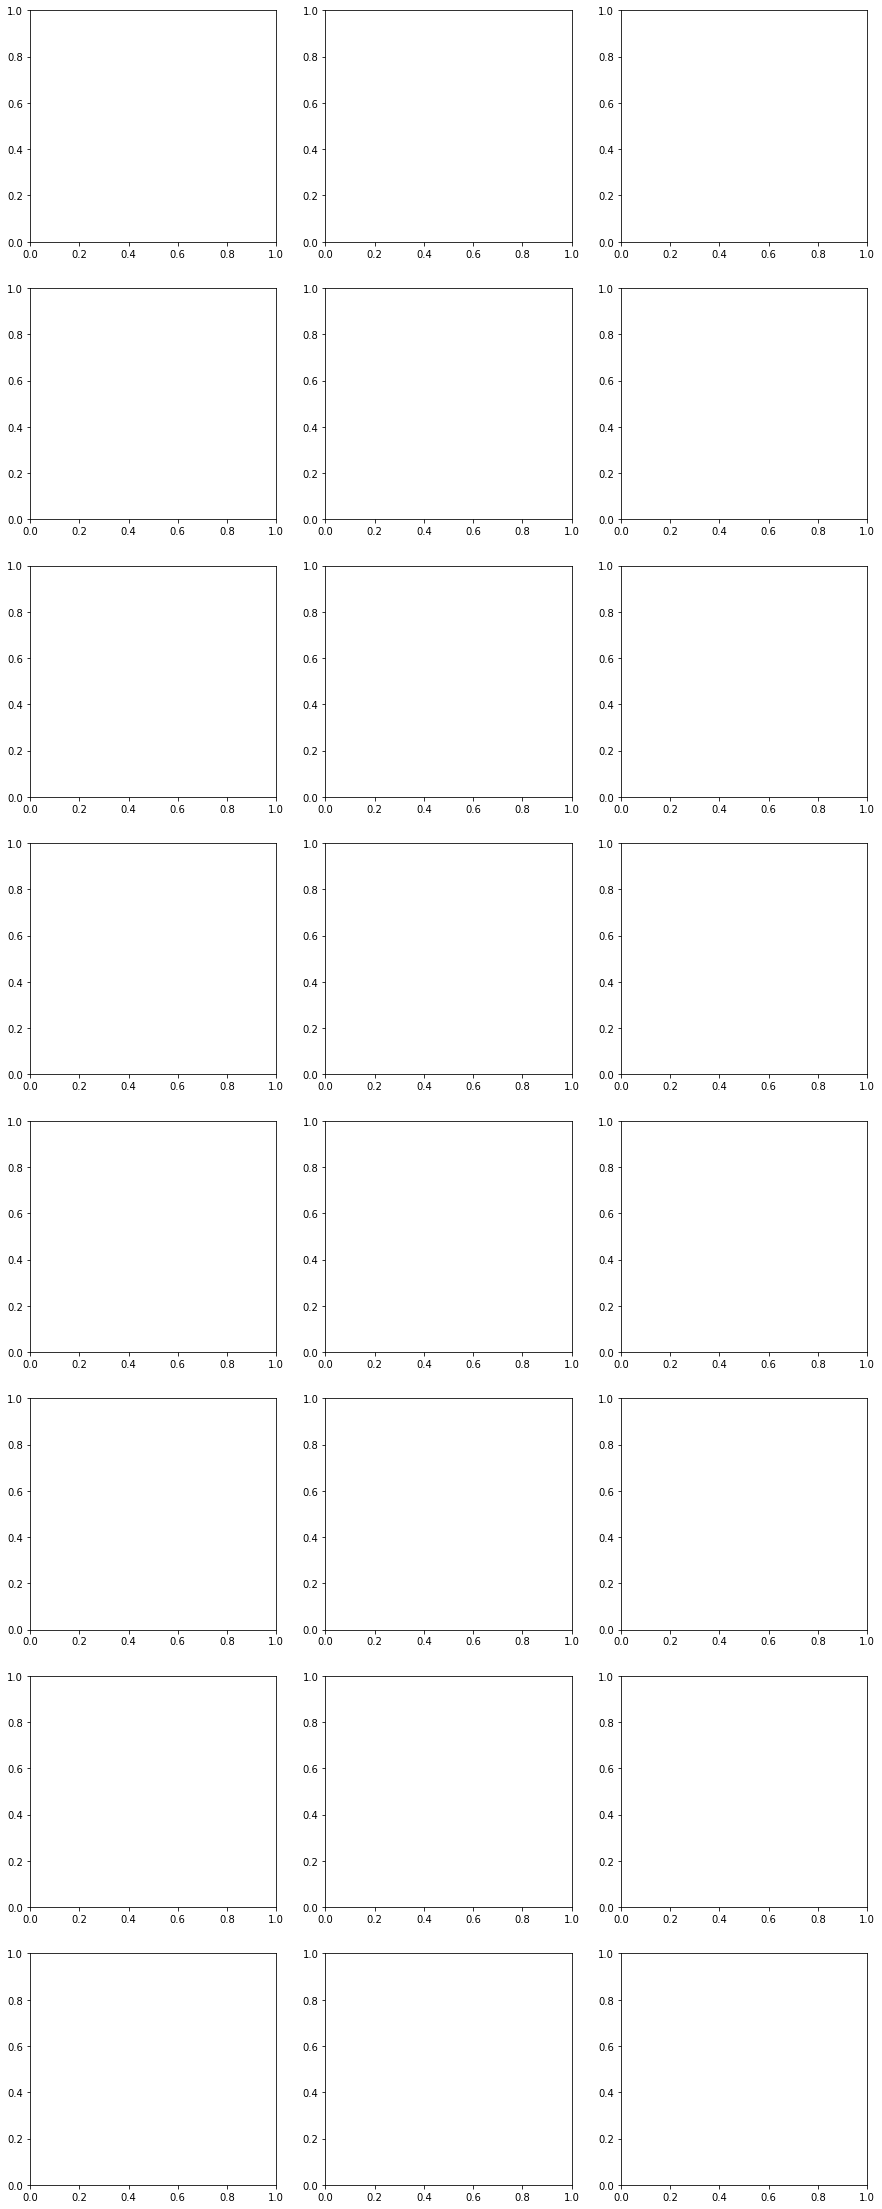

In [27]:
test_batch_size = 8
fig, axes = plt.subplots(test_batch_size, 3, figsize=(3*5, test_batch_size*5))

for l, i, j, k in enumerate(zip(a, b, c)):
    
    landscape = np.array(Image.open("/home/manojkl/Documents/MT/Data/labels_compare/color/"+i).convert("RGB"))
    label_class = np.array(Image.open("/home/manojkl/Documents/MT/Data/labels_compare/color_mask/"+j).convert("RGB"))
    label_class_predicted = np.array(Image.open("/home/manojkl/Documents/MT/Data/labels_compare/2_classes/"+k).convert("RGB"))
    
    axes[l, 0].imshow(landscape)
    axes[l, 0].set_title("Landscape")
    axes[l, 1].imshow(label_class)
    axes[l, 1].set_title("Label Class")
    axes[l, 2].imshow(label_class_predicted)
    axes[l, 2].set_title("Label Class - Predicted")